<a href="https://colab.research.google.com/github/kamg2218/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json

api_key = "556d4371416b616d36365368525557"
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000"

start_year, start_month = 2015, 1
end_year, end_month = 2024, 12

def month_iter(y1, m1, y2, m2):
    y, m = y1, m1
    while (y < y2) or (y == y2 and m <= m2):
        yield str(y), str(m).zfill(2)
        m += 1
        if m == 13:
            y += 1
            m = 1

months = [(y,m) for y, m in month_iter(start_year, start_month, end_year, end_month)]

get_specific_data = lambda row : {'YEAR': row['YEAR'], 'MON': row['MON'], 'EUS': row['EUS'], 'GUS': row['GUS'], 'WUS':row['WUS'], 'HUS': row['HUS']}

arranged_rows = []
for y, m in months:
    url = f"{base_url}/{y}/{m}"
    response = requests.get(url)

    if response.status_code == 200:
        result = response.json()
        rows = result['energyUseDataSummaryInfo']['row']
        personal_rows = list(filter(lambda x: x['MM_TYPE'] == '개인', rows))
        arranged_row = list(map(get_specific_data, personal_rows))
        arranged_rows.extend(arranged_row)
    else:
        print(f"api 호출 실패 : {response.status_code}")

print(arranged_rows)

with open('result.txt', 'w') as file:
    file.write(json.dumps(arranged_rows))



[{'YEAR': '2015', 'MON': '01', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}, {'YEAR': '2015', 'MON': '02', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}, {'YEAR': '2015', 'MON': '03', 'EUS': '175215719', 'GUS': '49984873', 'WUS': '12655474.249', 'HUS': '13826348.508'}, {'YEAR': '2015', 'MON': '04', 'EUS': '183891769', 'GUS': '37306841', 'WUS': '12954773.246', 'HUS': '5836002.885'}, {'YEAR': '2015', 'MON': '05', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}, {'YEAR': '2015', 'MON': '06', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}, {'YEAR': '2015', 'MON': '07', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}, {'YEAR': '2015', 'MON': '08', 'EUS': '242000479', 'GUS': '7619018', 'WUS': '15164553.742', 'HUS': '460288.965'}, {'YEAR': '2015', 'MON': '09', 'EUS': '207540868', 'GUS': '6518422', 'WUS': '14419

In [ ]:
import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

df = df[["YEAR", "MON", "EUS", "GUS", "WUS", "HUS"]]

print(df)

     YEAR MON        EUS         GUS           WUS           HUS
0    2015  01  193784708  59133720.0  1.281976e+07  2.274084e+07
1    2015  02  189974230  56487358.0  1.265689e+07  1.879332e+07
2    2015  03  175215719  49984873.0  1.265547e+07  1.382635e+07
3    2015  04  183891769  37306841.0  1.295477e+07  5.836003e+06
4    2015  05  177289769  22060892.0  1.308673e+07  1.320896e+06
..    ...  ..        ...         ...           ...           ...
115  2024  08  463971328   7072251.0  1.587354e+07  1.300823e+05
116  2024  09  409872908   5729131.0  1.514332e+07  3.420507e+06
117  2024  10  282268119   8233421.0  1.529767e+07  2.695491e+06
118  2024  11  257927956  17418221.0  1.467867e+07  8.836296e+06
119  2024  12  134828126  42103424.0  7.326854e+06  1.513199e+06

[120 rows x 6 columns]


In [ ]:
import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["SEASON"] = df["MON"].astype(int).apply(get_season)

df = df[["YEAR", "MON", "SEASON", "EUS", "GUS", "WUS", "HUS"]]
print(df)

     YEAR MON SEASON        EUS         GUS           WUS           HUS
0    2015  01     겨울  193784708  59133720.0  1.281976e+07  2.274084e+07
1    2015  02     겨울  189974230  56487358.0  1.265689e+07  1.879332e+07
2    2015  03      봄  175215719  49984873.0  1.265547e+07  1.382635e+07
3    2015  04      봄  183891769  37306841.0  1.295477e+07  5.836003e+06
4    2015  05      봄  177289769  22060892.0  1.308673e+07  1.320896e+06
..    ...  ..    ...        ...         ...           ...           ...
115  2024  08     여름  463971328   7072251.0  1.587354e+07  1.300823e+05
116  2024  09     가을  409872908   5729131.0  1.514332e+07  3.420507e+06
117  2024  10     가을  282268119   8233421.0  1.529767e+07  2.695491e+06
118  2024  11     가을  257927956  17418221.0  1.467867e+07  8.836296e+06
119  2024  12     겨울  134828126  42103424.0  7.326854e+06  1.513199e+06

[120 rows x 7 columns]


In [4]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

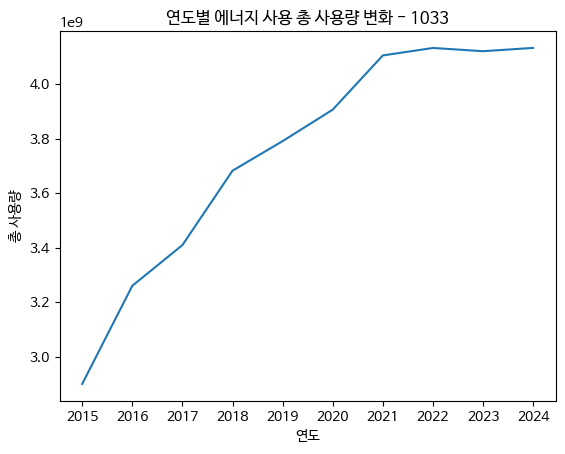

In [ ]:
import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["SEASON"] = df["MON"].astype(int).apply(get_season)
df = df[["YEAR", "MON", "SEASON", "EUS", "GUS", "WUS", "HUS"]]


fig, ax = plt.subplots()

x = df["YEAR"].unique()

df["TOTAL"] = df[["EUS", "GUS", "WUS", "HUS"]].sum(axis=1)
y = df.groupby("YEAR")[["TOTAL"]].sum()

ax.plot(x, y)
ax.set_title("연도별 에너지 사용 총 사용량 변화 - 1033")
ax.set_xlabel("연도")
ax.set_ylabel("총 사용량")
plt.show()

SEASON
가을    1.501570e+07
겨울    6.657663e+07
봄     4.443600e+07
여름    1.127243e+07
Name: GUS, dtype: float64


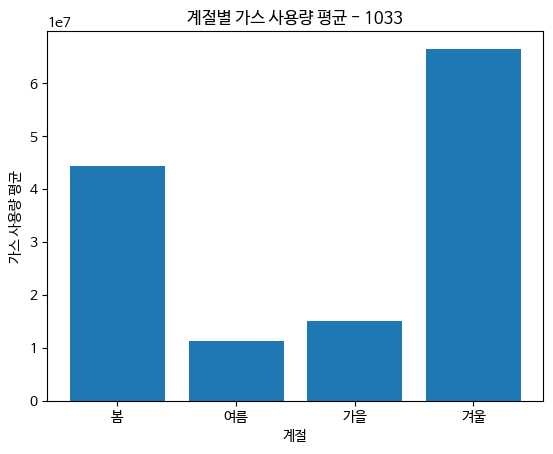

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["SEASON"] = df["MON"].astype(int).apply(get_season)
df = df[["YEAR", "MON", "SEASON", "EUS", "GUS", "WUS", "HUS"]]

fig, ax = plt.subplots()

x = ["봄", "여름", "가을", "겨울"]

season_mean = df.groupby("SEASON")["GUS"].mean()
print(season_mean)
y = season_mean.reindex(x).values

ax.bar(x, y)

ax.set_title("계절별 가스 사용량 평균 - 1033")
ax.set_xlabel("계절")
ax.set_ylabel("가스 사용량 평균")
plt.show()

12강 기준, 다시 작성

In [21]:
import requests
import json
import pandas as pd

api_key = "556d4371416b616d36365368525557"
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000"

start_year, start_month = 2015, 1
end_year, end_month = 2024, 12

def month_iter(y1, m1, y2, m2):
    y, m = y1, m1
    while (y < y2) or (y == y2 and m <= m2):
        yield str(y), str(m).zfill(2)
        m += 1
        if m == 13:
            y += 1
            m = 1

months = [(y,m) for y, m in month_iter(start_year, start_month, end_year, end_month)]

arranged_rows = []
for y, m in months:
    url = f"{base_url}/{y}/{m}"
    response = requests.get(url)

    if response.status_code == 200:
        result = response.json()
        rows = result['energyUseDataSummaryInfo']['row']
        personal_rows = list(filter(lambda x: x['MM_TYPE'] == '개인', rows))
        arranged_rows.extend(personal_rows)
    else:
        print(f"api 호출 실패 : {response.status_code}")

print(arranged_rows)


[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'CNT': '774620', 'EUS': '189974230', 'EUS1': '193611430', 'EUS2': '200055533', 'ECO2_1': '-6859251.5', 'ECO2_2': '-2908322.636', 'GUS': '56487358', 'GUS1': '59353536', 'GUS2': '66191173', 'GCO2_1': '-6284996.5', 'GCO2_2': '-14078392.16', 'WUS': '12656888.218', 'WUS1': '12713146.172', 'WUS2': '12948410.081', 'WCO2_1': '-173889.9085', 'WCO2_2': '-57731.449622', 'HUS': '18793320.213', 'HUS1

In [75]:
import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

df = df[["YEAR", "MON", "EUS", "GUS", "WUS", "HUS"]]

df.describe()

,EUS,GUS,WUS,HUS
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,2.527874e+08,3.432519e+07,1.415164e+07,1.072995e+07
std,5.288247e+07,2.565226e+07,1.251391e+06,1.299474e+07
min,1.348281e+08,5.729131e+06,7.215169e+06,1.585551e+04
25%,2.187215e+08,1.070171e+07,1.371980e+07,1.346257e+06
50%,2.460598e+08,2.535242e+07,1.432136e+07,5.627420e+06
75%,2.698189e+08,5.511033e+07,1.491005e+07,1.895929e+07
max,4.639713e+08,9.000496e+07,1.661911e+07,1.061349e+08


In [76]:
def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["YEAR"] = pd.to_numeric(df["YEAR"])
df["MON"] = pd.to_numeric(df["MON"])
df["SEASON"] = df["MON"].map(get_season)

print(df)

df.describe()

     YEAR  MON        EUS         GUS           WUS           HUS SEASON
0    2015    1  193784708  59133720.0  1.281976e+07  2.274084e+07     겨울
1    2015    2  189974230  56487358.0  1.265689e+07  1.879332e+07     겨울
2    2015    3  175215719  49984873.0  1.265547e+07  1.382635e+07      봄
3    2015    4  183891769  37306841.0  1.295477e+07  5.836003e+06      봄
4    2015    5  177289769  22060892.0  1.308673e+07  1.320896e+06      봄
..    ...  ...        ...         ...           ...           ...    ...
115  2024    8  463971328   7072251.0  1.587354e+07  1.300823e+05     여름
116  2024    9  409872908   5729131.0  1.514332e+07  3.420507e+06     가을
117  2024   10  282268119   8233421.0  1.529767e+07  2.695491e+06     가을
118  2024   11  257927956  17418221.0  1.467867e+07  8.836296e+06     가을
119  2024   12  134828126  42103424.0  7.326854e+06  1.513199e+06     겨울

[120 rows x 7 columns]


,YEAR,MON,EUS,GUS,WUS,HUS
count,120.000000,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,2019.500000,6.500000,2.527874e+08,3.432519e+07,1.415164e+07,1.072995e+07
std,2.884324,3.466527,5.288247e+07,2.565226e+07,1.251391e+06,1.299474e+07
min,2015.000000,1.000000,1.348281e+08,5.729131e+06,7.215169e+06,1.585551e+04
25%,2017.000000,3.750000,2.187215e+08,1.070171e+07,1.371980e+07,1.346257e+06
50%,2019.500000,6.500000,2.460598e+08,2.535242e+07,1.432136e+07,5.627420e+06
75%,2022.000000,9.250000,2.698189e+08,5.511033e+07,1.491005e+07,1.895929e+07
max,2024.000000,12.000000,4.639713e+08,9.000496e+07,1.661911e+07,1.061349e+08


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

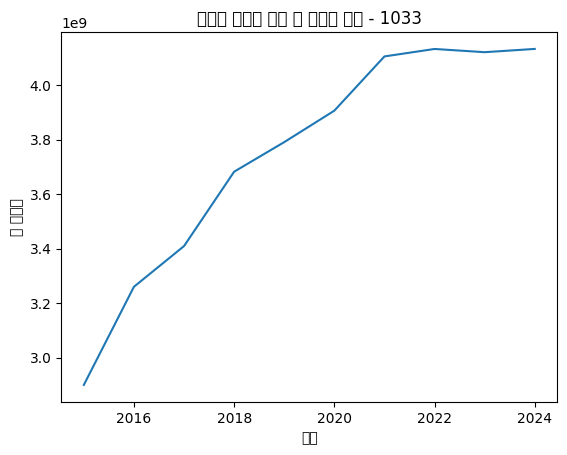

In [83]:
x = df["YEAR"].unique()

df["TOTAL"] = df[["EUS", "GUS", "WUS", "HUS"]].sum(axis=1)
y = df.groupby("YEAR")[["TOTAL"]].sum()

plt.plot(x, y)
plt.title("연도별 에너지 사용 총 사용량 변화 - 1033")
plt.xlabel("연도")
plt.ylabel("총 사용량")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

SEASON
봄     4.443600e+07
여름    1.127243e+07
가을    1.501570e+07
겨울    6.657663e+07
Name: GUS, dtype: float64


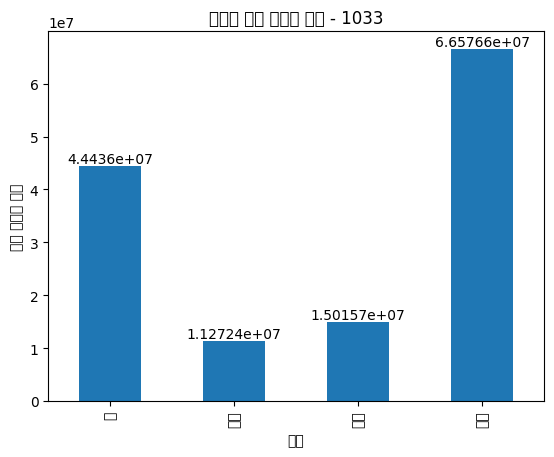

In [98]:
x = ["봄", "여름", "가을", "겨울"]

season_mean = df.groupby("SEASON")["GUS"].mean().reindex(x)
print(season_mean)

bars = season_mean.plot(kind='bar')
plt.title("계절별 가스 사용량 평균 - 1033")
plt.xlabel("계절")
plt.ylabel("가스 사용량 평균")

for bar in bars.containers:
    bars.bar_label(bar)

plt.show()

전자 기기의 보급 확대와 생활 수준 상승의 영향으로 연도가 지남에 따라 총 에너지 사용량이 증가한 것으로 보인다.